In [13]:
using LinearAlgebra
using PyPlot
using Random
using Statistics
using Printf
using JLD2, FileIO
using ProgressMeter
include("ILearning.jl");
rng = MersenneTwister(1234);

In [2]:
N = 200;
P = 10;

In [3]:
### Noise Level Vector
n = 50
NoiseValues = 0:1/(n-1):1;
Nnoise = length(NoiseValues);

## Noise Vector
Success_0 = zeros(Int64,(1,length(NoiseValues)));
Success_1 = zeros(Int64,(1,length(NoiseValues)));
Success_2 = zeros(Int64,(1,length(NoiseValues)));
Success_3 = zeros(Int64,(1,length(NoiseValues)));


### Number of Simulations
Nsim = 300

### Number of maximum iterations for the HNN model
it_max =1000


1000

In [4]:
BinaryMultiStates,ComplexMultiStates  = ILearning.Multi_Estados()

([1, -1], Complex{Float64}[1.0 + 1.0im, 1.0 - 1.0im, -1.0 + 1.0im, -1.0 - 1.0im])

In [5]:
# First Order W matrix
Wc = zeros(Complex,N,N);

In [8]:
@showprogress for s = 1:Nsim
    
# Complex Matrix 
    U = Array{ComplexF64}(undef,(N,P))

    for i = 1:N
        for j = 1:P
            U[i,j] = sign.(randn(rng,Float64)) + im*sign.(randn(rng,Float64))
        end
    end


    W1 = ILearning.train(ILearning.first,U,nothing)
    W2 = ILearning.train(ILearning.second,U,nothing)
    Wc = ILearning.Correlation(U,nothing);
    Wp = ILearning.Projection(U)

    
    u1 = copy(U[:,1]);

    for i = 1:Nnoise

        ### Adding Noise
        
        xr = ILearning.noise(u1,ComplexMultiStates,NoiseValues[i])
        
        
        y = ILearning.Asy(W1,xr,ILearning.splitsign,nothing,it_max)
        
        Error = norm(u1-y)

        if Error<1.e-4
            Success_0[i] = Success_0[i] + 1
        end

        y = ILearning.Asy(W2,xr,ILearning.splitsign,nothing,it_max)
        
        Error = norm(u1-y)

        if Error<1.e-4
            Success_1[i] = Success_1[i] + 1
        end
        
        y = ILearning.Asy(Wc,xr,ILearning.splitsign,nothing,it_max)
        
        Error = norm(u1-y)

        if Error<1.e-4
            Success_2[i] = Success_2[i] + 1
        end
        
        y = ILearning.Asy(Wp,xr,ILearning.splitsign,nothing,it_max)
        
        Error = norm(u1-y)

        if Error<1.e-4
            Success_3[i] = Success_3[i] + 1
        end
        
        
    end
    
@save "JLDs/ComplexSplit_10.jld2"  NoiseValues Success_0 Success_1 Success_2 Success_3  Nsim P
     
end

Progress: 100%|█████████████████████████████████████████| Time: 0:07:32


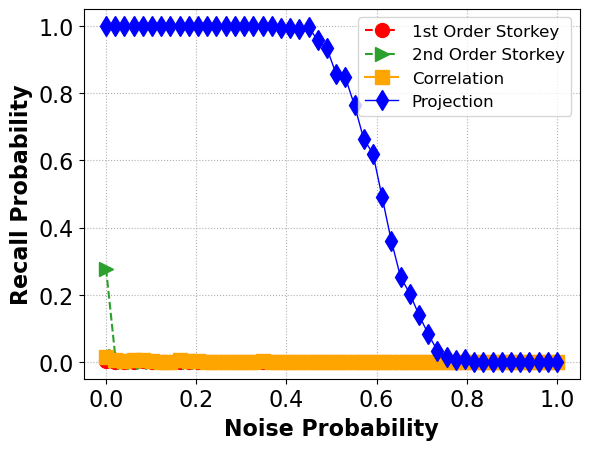

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [14]:
@load "JLDs/ComplexSplit_40.jld2"
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
font0 = Dict(
        "font.size" => 18,
        "axes.labelweight" => "bold",
        "axes.labelsize" => 16,
        "xtick.labelsize" => 16,
        "ytick.labelsize" => 16,
        "legend.fontsize" => 12,
)
merge!(rcParams, font0)

### Loading String Name
#name1 = "SplitSign Complex Hopfield Neural Network with p =10 and N=200"
#name = name1


#title(name)

plot(NoiseValues,Success_0[1,:]/Nsim,linewidth=1.5,color="red",linestyle ="dashed", marker="o",markersize = 10,label = "1st Order Storkey")

plot(NoiseValues,Success_1[1,:]/Nsim,color="#2ca02c",linestyle ="dashed", marker=">",markersize = 10,label = "2nd Order Storkey")

plot(NoiseValues,Success_2[1,:]/Nsim,color="orange",linestyle ="solid", marker="s",markersize = 10,label = "Correlation")

plot(NoiseValues,Success_3[1,:]/Nsim,linewidth=1,color="blue",linestyle ="solid", marker="d",markersize = 10,label = "Projection")

grid(linestyle="dotted")
xlabel("Noise Probability")
ylabel("Recall Probability")
legend()

savefig("Figures/ComplexSplitSign_40.eps")
savefig("Figures/ComplexSplitSign_40.eps")